<a href="https://colab.research.google.com/github/Neeshi14/Task7/blob/main/2)CNNusingpytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
train_dataset = datasets.MNIST('../data', train=True, download=True,
                              transform=transforms.ToTensor())

In [3]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=164, shuffle=True)

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])  #((mean,Std))

In [5]:
test_dataset = datasets.MNIST('../data',train=False, transform=transforms.ToTensor())

In [6]:
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=100,shuffle=True)

In [7]:
# where [N->no of sample , C-> channels, H-> height , W -> width]
for X, Y in train_loader:
    print("TRAIN_LOADER SHAPE")
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {Y.shape} {Y.dtype}")
    break
for X, Y in test_loader:
    print("TEST_LOADER SHAPE")
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {Y.shape} {Y.dtype}")
    break

TRAIN_LOADER SHAPE
Shape of X [N, C, H, W]: torch.Size([164, 1, 28, 28])
Shape of y: torch.Size([164]) torch.int64
TEST_LOADER SHAPE
Shape of X [N, C, H, W]: torch.Size([100, 1, 28, 28])
Shape of y: torch.Size([100]) torch.int64


# **Implement the CNN model**

In [8]:
import torch.nn as nn  # for building neural networks
import torch.nn.functional as F # for activation function

In [9]:
class Net(nn.Module):
  def __init__(self):
     super(Net,self).__init__()
     self.conv1=nn.Conv2d(1,32,3,1)#conv2d(input channel,output channel,kernel size,stride)
     self.conv2=nn.Conv2d(32,64,3,1)
     self.conv3=nn.Conv2d(64,128,3,1)
     self.conv4=nn.Conv2d(128,256,3,1)
     self.dropout1=nn.Dropout2d(0.25)
     self.dropout2=nn.Dropout2d(0.5)
     self.dropout3=nn.Dropout2d(0.25)
     self.conv5=nn.Conv2d(256,750,3,1)
     self.fc1=nn.Linear(750,100)# fully connected layer,16->input feature,100->output feature
     self.fc2=nn.Linear(100,10)

  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(x)
    x=self.conv2(x)
    x=F.relu(x)
    x=F.max_pool2d(x,kernel_size=2)
    x=self.dropout1(x)

    x=self.conv3(x)
    x=F.relu(x)
    x=self.conv4(x)
    x=F.max_pool2d(x,kernel_size=2)
    x= self.dropout2(x)

    x=self.conv5(x)
    x=F.relu(x)
    x=F.max_pool2d(x,kernel_size=2)

    x=torch.flatten(x,1)
    x=self.fc1(x)
    x=F.relu(x)
    x=self.dropout3(x)
    x=self.fc2(x)
    output =F.softmax(x,dim=1)
    return output
model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (dropout3): Dropout2d(p=0.25, inplace=False)
  (conv5): Conv2d(256, 750, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=750, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [10]:
import torch.optim as optim

model = Net()  # Create an instance of your CNN model
optimizer = optim.Adam(model.parameters(), lr=0.001)   #Parameters()->learnable parameter(likes:Weights and biases, learning rate=0.001)
loss_fn = nn.CrossEntropyLoss()  # Choose a loss function

In [11]:
def train(train_loader, model, loss_fn, optimizer):
    size = len(train_loader.dataset)
    model.train()

    for batch, (X, y) in enumerate(train_loader):

        # Compute prediction error
        predicted = model(X)
        loss = loss_fn(predicted, y)

        # Backpropagation
        loss.backward()#Backpropagate gradients
        optimizer.step()#update model paramenter
        optimizer.zero_grad()#reset gradients

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")#The > symbols are used for formatting the output

In [12]:
def test(test_loader, model, loss_fn):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in test_loader:

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")#The > symbols are used for formatting the output

In [13]:
epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


loss: 2.302463  [  164/60000]
loss: 1.668871  [16564/60000]
loss: 1.569837  [32964/60000]
loss: 1.540231  [49364/60000]
Test Error: 
 Accuracy: 94.2%, Avg loss: 1.519473 

Epoch 2
-------------------------------
loss: 1.554200  [  164/60000]
loss: 1.538257  [16564/60000]
loss: 1.501243  [32964/60000]
loss: 1.562369  [49364/60000]
Test Error: 
 Accuracy: 96.7%, Avg loss: 1.493679 

Epoch 3
-------------------------------
loss: 1.496409  [  164/60000]
loss: 1.497155  [16564/60000]
loss: 1.539236  [32964/60000]
loss: 1.501813  [49364/60000]
Test Error: 
 Accuracy: 97.3%, Avg loss: 1.487891 

Done!


In [14]:
correct_predictions = 0
total_images = 0

with torch.no_grad():  # Disable gradient calculation for testing
    for images,label in test_loader:
        predictions = model(images) #model's predictions for the current batch of images
        _, predicted_class = torch.max(predictions, 1) #predicted class for each image
        total_images += label.size(0)
        correct_predictions += (predicted_class == label).sum().item()

accuracy = 100 * correct_predictions / total_images
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 97.32%


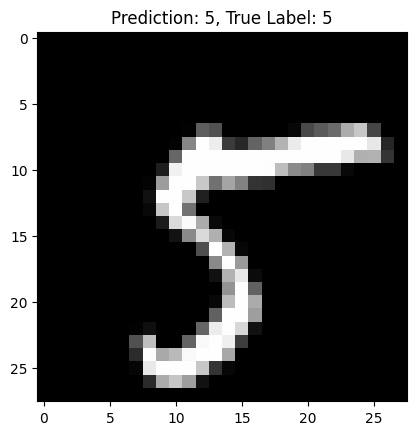

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get a single image from the test loader
dataiter = iter(test_loader)
images, labels = next(dataiter)
image = images[0]  # Get the first image
true_label = labels[0]  # Get the true label of the first image

# Make a prediction
with torch.no_grad():
    output = model(image.unsqueeze(0))  # Add a batch dimension
    _, predicted = torch.max(output.data, 1)

# Display the image and prediction
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title(f'Prediction: {predicted.item()}, True Label: {true_label.item()}')
plt.show()

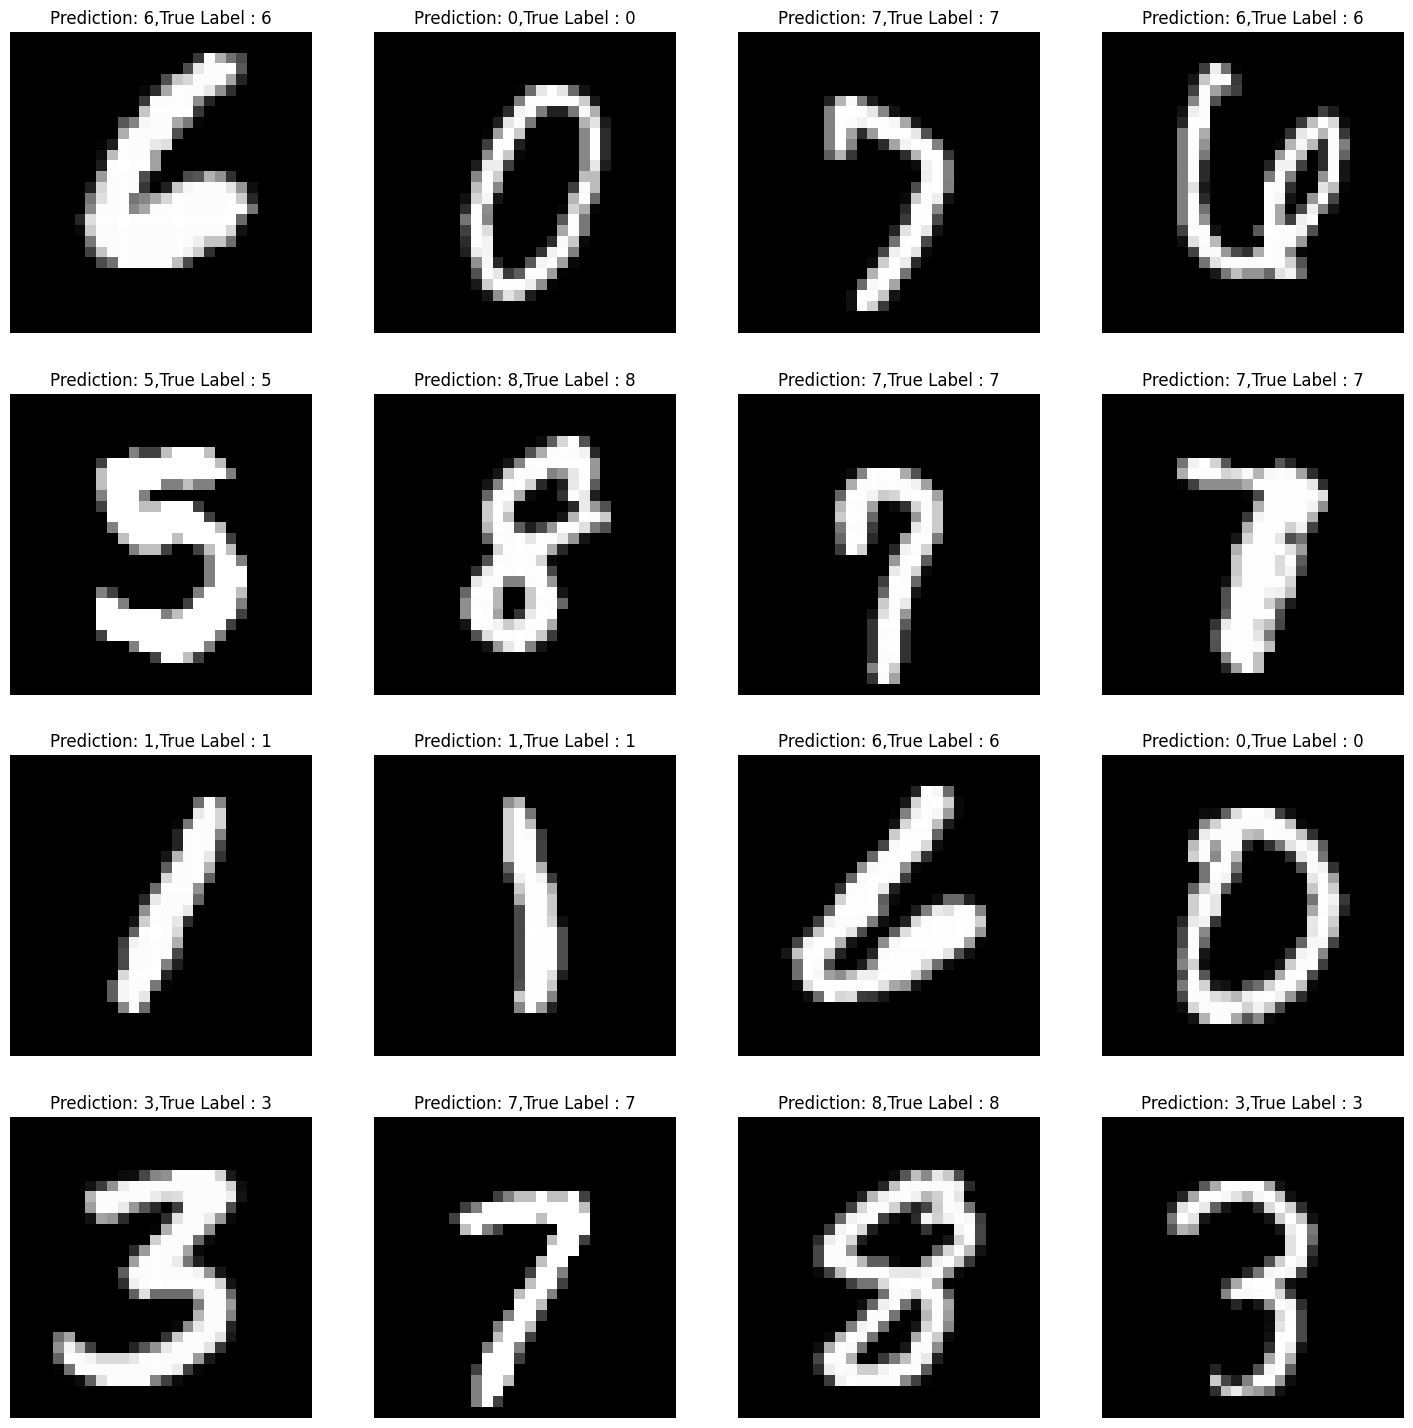

In [16]:
# Get a batch of images from the test loader
images, labels = next(iter(test_loader))

# Make predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

# Display some images and their predictions
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))
true_label = labels.numpy()
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze().numpy(), cmap='gray')
    ax.set_title(f'Prediction: {predicted[i].item()},True Label : {true_label[i]}')
    ax.axis('off')
plt.show()